In [1]:
import DataObserver

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.width', 1000)

In [3]:
sns.set(style="whitegrid", color_codes=True)
sns.set_style("ticks")
sns.set_style("darkgrid")

In [4]:
# Importing data from the processed 'news' DataFrame.
df = DataObserver.build_simply(file_path= '/Users/admin/Documents/Work/AAIHC/AAIHC-Python/Program/DataMine/Reddit/json_data/Processed_DataFrames/r-news/DF-version_2/DF_v2.json')

# Define current working DataFrame.
cw_df = df[['ups', 'downs', 'category', 'sentiment_score', 'sentiment_magnitude', 'date_created', 'time_created']]

In [5]:
df.head()

,id,parent_id,submission_id,subreddit_name_prefixed,body,ups,downs,score,controversiality,category,sentiment_score,sentiment_magnitude,created,date_created,time_created
0,dq5m0u8,t3_7ej943,news-7ej943,r/news,"""Welcome to the new internet, where you can ch...",873,0,873,0,Internet & Telecom,0.0,5.0,1511323061,2017-11-21,14:57:41
1,dq5cn1q,t3_7ej943,news-7ej943,r/news,One of the most impressive achievements of hum...,4938,0,4938,0,Arts & Entertainment,0.2,0.4,1511313850,2017-11-21,12:24:10
2,dq5ehaq,t3_7ej943,news-7ej943,r/news,"Since apparently the way we govern now is ""fuc...",989,0,989,0,Arts & Entertainment,-0.8,0.8,1511315664,2017-11-21,12:54:24
3,dq5fi6l,t3_7ej943,news-7ej943,r/news,"> ""Under my proposal, the federal government w...",14416,0,14416,0,Law & Government,-0.4,0.8,1511316676,2017-11-21,13:11:16
4,dq5dp2j,t3_7ej943,news-7ej943,r/news,\nWhat about states rights? Could a state vote...,883,0,883,0,People & Society,0.0,2.3,1511314889,2017-11-21,12:41:29


In [6]:
cw_df.head()

,ups,downs,category,sentiment_score,sentiment_magnitude,date_created,time_created
0,873,0,Internet & Telecom,0.0,5.0,2017-11-21,14:57:41
1,4938,0,Arts & Entertainment,0.2,0.4,2017-11-21,12:24:10
2,989,0,Arts & Entertainment,-0.8,0.8,2017-11-21,12:54:24
3,14416,0,Law & Government,-0.4,0.8,2017-11-21,13:11:16
4,883,0,People & Society,0.0,2.3,2017-11-21,12:41:29


In [7]:
cw_df.describe()

,ups,downs,sentiment_score,sentiment_magnitude
count,16288.000000,16288.0,16288.000000,16288.000000
mean,373.787205,0.0,-0.118615,1.479126
std,1492.297970,0.0,0.296714,1.906360
min,1.000000,0.0,-0.900000,0.000000
25%,9.000000,0.0,-0.300000,0.600000
50%,30.000000,0.0,-0.100000,1.000000
75%,156.000000,0.0,0.000000,1.800000
max,33737.000000,0.0,0.900000,60.500000


In [8]:
# Define the DataFrames with only a single "Category".
int_and_tel = cw_df.loc[cw_df['category'] == 'Internet & Telecom']
int_and_tel.sort_index(axis= 0, inplace= True)
int_and_tel.reset_index(inplace= True, drop= True)

In [31]:
int_and_tel.head()

,ups,downs,category,sentiment_score,sentiment_magnitude,date_created,time_created
0,873,0,Internet & Telecom,0.0,5.0,2017-11-21,14:57:41
1,30,0,Internet & Telecom,-0.3,1.1,2017-11-21,13:30:59
2,23,0,Internet & Telecom,-0.4,1.3,2017-11-21,16:24:21
3,425,0,Internet & Telecom,-0.1,2.5,2017-11-21,15:07:29
4,11,0,Internet & Telecom,0.0,1.7,2017-11-21,14:32:26


In [30]:
# Rows where magnitude is greater than 10.
int_and_tel.loc[int_and_tel['sentiment_magnitude'] >= 10]

,ups,downs,category,sentiment_score,sentiment_magnitude,date_created,time_created
120,7,0,Internet & Telecom,-0.2,10.8,2017-11-29,00:51:53
148,18,0,Internet & Telecom,-0.1,13.0,2017-11-29,19:51:40
176,1933,0,Internet & Telecom,-0.1,24.1,2017-11-29,17:28:31
223,13,0,Internet & Telecom,-0.4,16.0,2017-11-04,13:11:07
241,489,0,Internet & Telecom,-0.2,11.1,2017-12-05,20:16:38
361,345,0,Internet & Telecom,-0.3,15.0,2017-12-19,18:25:37
450,114,0,Internet & Telecom,-0.2,10.2,2017-07-13,18:48:40


In [10]:
int_and_tel.describe()

,ups,downs,sentiment_score,sentiment_magnitude
count,497.000000,497.0,497.000000,497.000000
mean,407.175050,0.0,-0.144467,1.565594
std,1567.488931,0.0,0.269809,1.990523
min,2.000000,0.0,-0.900000,0.000000
25%,8.000000,0.0,-0.300000,0.500000
50%,25.000000,0.0,-0.100000,1.100000
75%,153.000000,0.0,0.000000,1.900000
max,21269.000000,0.0,0.800000,24.100000


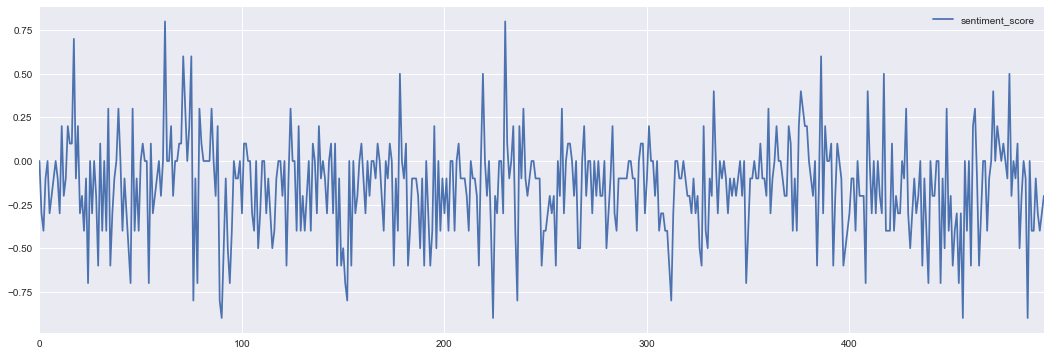

In [9]:
# Note: x-axis is the index.
int_and_tel.plot(y='sentiment_score', use_index= True, figsize=(18, 6))

In [16]:
int_tel_sentiment = int_and_tel[['sentiment_score', 'sentiment_magnitude']]
int_tel_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
sentiment_score        497 non-null float64
sentiment_magnitude    497 non-null float64
dtypes: float64(2)
memory usage: 7.8 KB


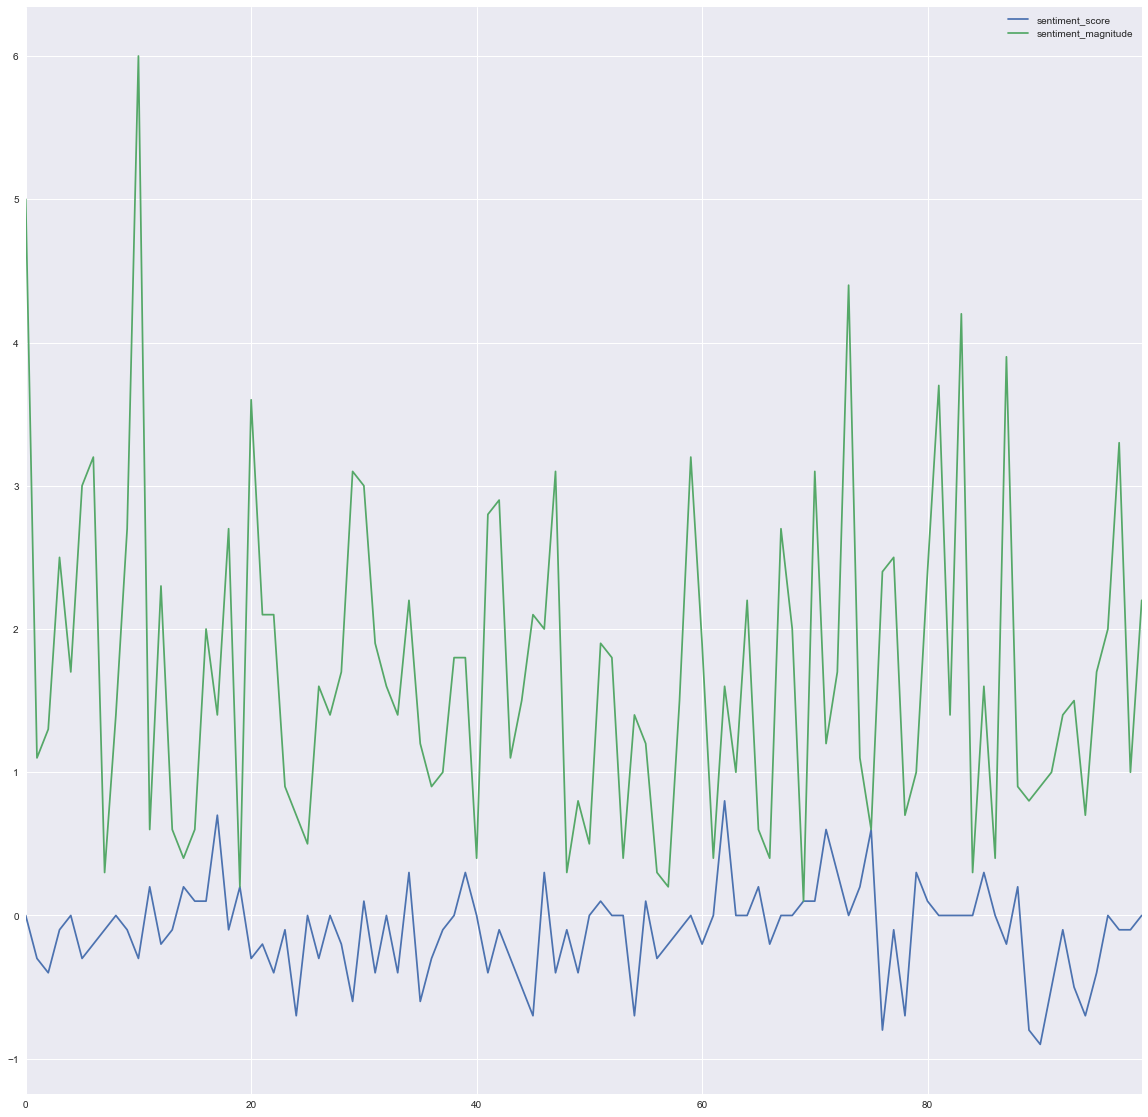

In [33]:
# Notes: 
#      - x-axis is the index.
#      - Must find a better way to represent these figures.

int_tel_sentiment[:100].plot(figsize=(20, 20))